<a href="https://colab.research.google.com/github/ReshmaShinde123/ReshmaShinde123/blob/main/Telecom_Churn_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Dataset:telecomm_churn:- 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
# to load csv file
df=pd.read_csv("/content/drive/My Drive/Notebook_ML/telecom_churn.csv")

Mounted at /content/drive


**Description of Dataset:**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#to check how many rows and columns
df.shape

(7043, 21)

In [ ]:
for col in df:
    print(col)
    print(df[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Customer to be deleted as it is unwanted
df.drop("customerID",axis=1,inplace = True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#to check null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df["TotalCharges"].value_counts()# Tocheck max occured value and special value

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df["TotalCharges"].replace(' ',np.nan,inplace=True) 

In [ ]:
df["TotalCharges"].value_counts()# To check max occured value and special value

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [ ]:
#to check null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df["TotalCharges"].dtype

dtype('O')

In [ ]:
#to find % of null values of TotalCharges column
df["TotalCharges"].isnull().sum()*100/df.shape[0]

0.15618344455487718

In [ ]:
#Total Charges having numeric data but stored as object. So we need to change that.
df["TotalCharges"]=df["TotalCharges"].astype("float") 

In [ ]:
#Check datatype
df["TotalCharges"].dtype

dtype('float64')

In [ ]:
#To fill null values of TotalCharges column with mean of TotalCharges, permanently
df['TotalCharges'].fillna(df["TotalCharges"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Identify & Separate Categorical and Numerical type columns
#As we saw some columns has Datatype as object and we can process only numeric data. We need to apply the label encoder
#select_dtypes()
#Separate the numerical data(int and float) and categorical data(object)
#First create dataframe name df_cat which hold object type data means categorical data
df_cat=df.select_dtypes(object) 
#here df_cat is a new dataframe for categorical type data
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


In [ ]:
#Now create second dataframe name df_num
#which hold int and float type data means numerical data
df_num=df.select_dtypes(['int64','float64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


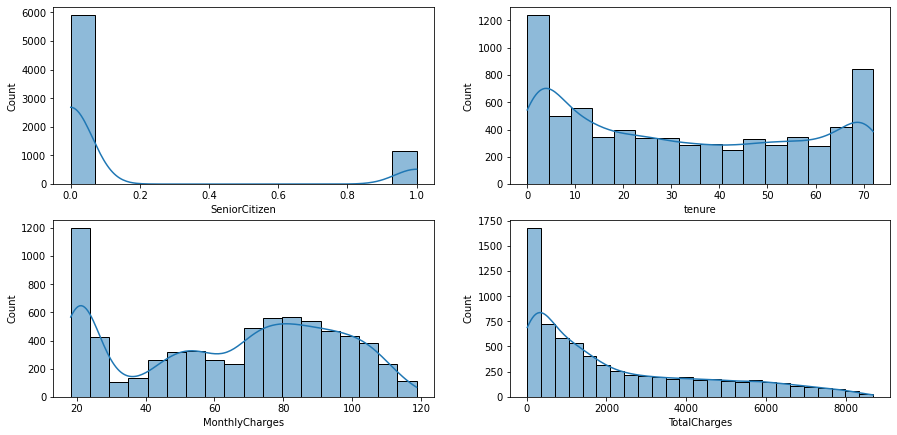

In [ ]:
#Check the histogram
plt.figure(figsize = (15,15))
for i,col in enumerate(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(4,2,i+1)
    sns.histplot(x = col, data = df, kde = True) #kde=True for plotting fitted density
plt.show()

In [ ]:
#Call LabelEncoder inbuilt class from sklearn.preprocessing library
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Create object of LabelEncoder class
le=LabelEncoder()

In [ ]:
#Convert catgorical data into numeric data
for col in df_cat:
    #create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])  

In [ ]:
#Again check the datatype of sorted DataFrame for categorical datatype
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   Partner           7043 non-null   int64
 2   Dependents        7043 non-null   int64
 3   PhoneService      7043 non-null   int64
 4   MultipleLines     7043 non-null   int64
 5   InternetService   7043 non-null   int64
 6   OnlineSecurity    7043 non-null   int64
 7   OnlineBackup      7043 non-null   int64
 8   DeviceProtection  7043 non-null   int64
 9   TechSupport       7043 non-null   int64
 10  StreamingTV       7043 non-null   int64
 11  StreamingMovies   7043 non-null   int64
 12  Contract          7043 non-null   int64
 13  PaperlessBilling  7043 non-null   int64
 14  PaymentMethod     7043 non-null   int64
 15  Churn             7043 non-null   int64
dtypes: int64(16)
memory usage: 880.5 KB


In [ ]:
#Create new DataFrame to combine converted dataframe and numerical data frame.
#We will use Pandas Inbuilt method concat()
df_new=pd.concat([df_num,df_cat],axis=1) #join column wise make axis=1, means left to right
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   int64  
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   int64  


In [ ]:
from sklearn.preprocessing import StandardScaler 
#Scaling always done on input columns not on output in classification as output is discrete
#But in regression it is done on both input and output columns

In [ ]:
#Select Input and Output
X=df_new.drop("Churn",axis=1)#input selection.temporary as inplace=True not used
Y=df_new["Churn"]#output
df_new.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [ ]:
#fit_transform on training data X_train and trasnform on testing_data means X_test
#Create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
print("After scaling training Data:  \n",X_train)
print("After scaling testing Data:  \n",X_test)

After scaling training Data:  
 [[-0.43979045 -0.49748235  0.12975533 ...  0.38426552  0.82758326
   0.39371116]
 [-0.43979045  1.49818033  1.29989652 ... -0.82237716  0.82758326
   0.39371116]
 [ 2.27381019 -0.82330483  0.51980239 ... -0.82237716  0.82758326
   0.39371116]
 ...
 [-0.43979045 -0.17165987  1.35798864 ... -0.82237716  0.82758326
   0.39371116]
 [-0.43979045 -1.23058292 -0.34494024 ... -0.82237716  0.82758326
   1.33366079]
 [-0.43979045 -0.66039359  0.11481736 ...  1.5909082  -1.20833764
  -1.48618812]]
After scaling testing Data:  
 [[-0.43979045  0.35780166  0.4998851  ...  0.38426552  0.82758326
  -1.48618812]
 [ 2.27381019  1.3759969   1.2484435  ...  1.5909082   0.82758326
  -1.48618812]
 [-0.43979045 -0.82330483 -0.65697789 ... -0.82237716  0.82758326
  -1.48618812]
 ...
 [ 2.27381019 -0.45675454  1.06254873 ... -0.82237716  0.82758326
  -1.48618812]
 [-0.43979045  1.53890814 -0.21215826 ...  0.38426552  0.82758326
  -1.48618812]
 [-0.43979045  0.5207129   0.290753

In [ ]:
#Create user defined function
def create_model(model): #here model is user defined object
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test)#test the model
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test,Y_pred))
    return model  

In [ ]:
#BaseLine model : Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

In [ ]:
#create the object of LogisticRegression class()
lgr=LogisticRegression()

In [ ]:
#call function
lgr=create_model(lgr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113

Confusion Matrix
[[1401  184]
 [ 219  309]]


In [ ]:
#0 customer not leaving service and scores mentioned infront of 0 are scores of accuracy of model 
#1 customer  leaving service and scores mentioned infront of 0 are scores of accuracy of model 
# as we see huge difference for precision score for 0(0.86) and (0.63)...it shows that data is unbalanced.
#Same is with recall and f1-score. 
#for 0 recall is 0.88 and for 1 recall is 0.59. hence Unbalanced
# all scores for 1 are not good. difference between scores of 0 & 1 is unbalaced

In [ ]:
df_new["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

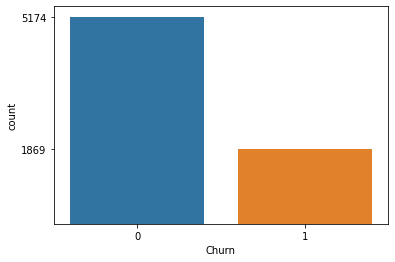

In [ ]:
#View in graph balanced or unbalanced data
sns.countplot(data=df_new,x='Churn')
c=df_new['Churn'].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
#One time install imblearn package
#! pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Use RandomOverSampler
#Create object of RandomOverSampler() class
ros=RandomOverSampler()

In [ ]:
#fit_resample() inbuilt method of RandomOverSampler()class
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [ ]:
#Before apply RandomOverSampler() on training data
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [ ]:
#after apply RandomOverSampler() on training data
pd.Series(Y_train1).value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [ ]:
#Apply RandomOverSampler over 30 % testing data
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [ ]:
#Before apply RandomOverSampler() on 30% testing data
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [ ]:
#after apply RandomOverSampler() on testing data
pd.Series(Y_test1).value_counts()

0    1585
1    1585
Name: Churn, dtype: int64

In [ ]:
#Create user defined function for ROS
def create_model1(model): #here model is user defined object
    model.fit(X_train1,Y_train1) #train the model
    Y_pred=model.predict(X_test1)#test the model
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test1,Y_pred))
    return model 

In [ ]:
#create baseline model: Logistic Regression
# Create object of Logisticregression class
lgr1=LogisticRegression()

In [ ]:
lgr1=create_model1(lgr1)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion Matrix
[[1161  424]
 [ 316 1269]]


In [ ]:
#Use RandomUnderSampler
#Create object of RandomOverSampler() class
rus=RandomUnderSampler()

In [ ]:
#fit_resample() inbuilt method of RandomUnderSampler()class
X_train2,Y_train2=rus.fit_resample(X_train,Y_train)

In [ ]:
#Before apply RandomUnderSampler() on training data
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [ ]:
#Before apply RandomUnderSampler() on training data
pd.Series(Y_train2).value_counts()

0    1341
1    1341
Name: Churn, dtype: int64

In [ ]:
#Apply RandomUnderSampler over 30 % testing data
X_test2,Y_test2=rus.fit_resample(X_test,Y_test)

In [ ]:
#Before apply RandomUnderSampler() on 30% testing data
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [ ]:
#after apply RandomUnderSampler() on testing data
pd.Series(Y_test2).value_counts()

0    528
1    528
Name: Churn, dtype: int64

In [ ]:
#Create user defined function for RUS
def create_model2(model): #here model is user defined object
    model.fit(X_train2,Y_train2) #train the model
    Y_pred=model.predict(X_test2)#test the model
    print(classification_report(Y_test2,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test2,Y_pred))
    return model 

In [ ]:
#create baseline model: Logistic Regression
# Create object of Logisticregression class
lgr2=LogisticRegression()

In [ ]:
lgr2=create_model2(lgr2)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       528
           1       0.76      0.82      0.79       528

    accuracy                           0.78      1056
   macro avg       0.78      0.78      0.78      1056
weighted avg       0.78      0.78      0.78      1056

Confusion Matrix
[[387 141]
 [ 93 435]]


From Classification Matrix Scores of ROS and RUS 
ROS 

                precision    recall  f1-score   support

           0       0.80      0.73      0.77      1585
           1       0.75      0.82      0.78      1585

RUS

                precision    recall  f1-score   support

           0       0.80      0.72      0.76       528
           1       0.75      0.82      0.78       528

ROS and RUS scores are same. But our churn count for No means (for 0) is more we will consider Random Over Sampling model and generate the reports of other machine learning algorithms 

Before that lets have a look at graphical representation for each input categorical and numeric column 

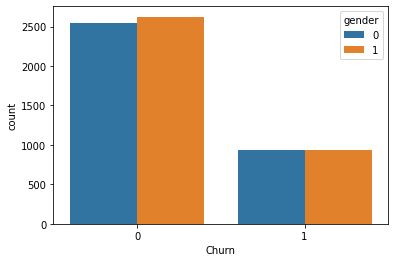

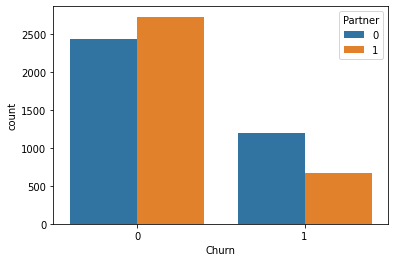

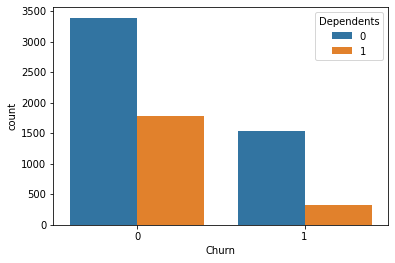

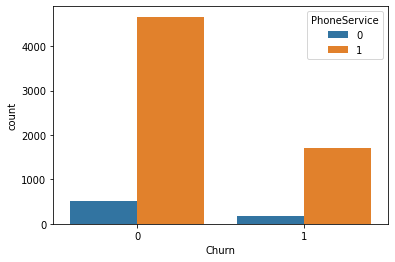

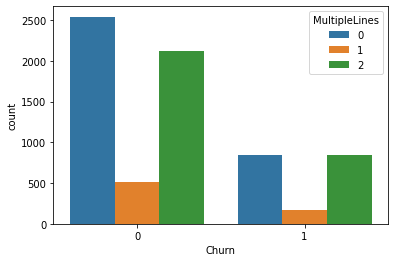

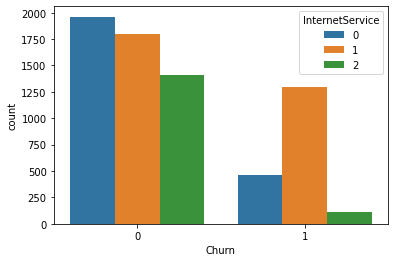

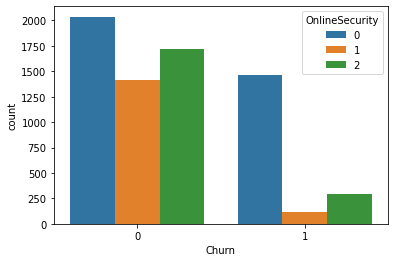

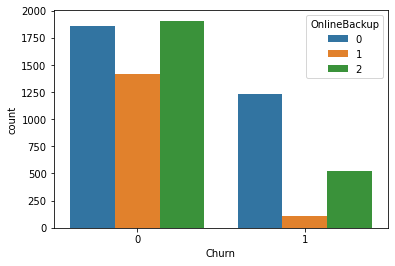

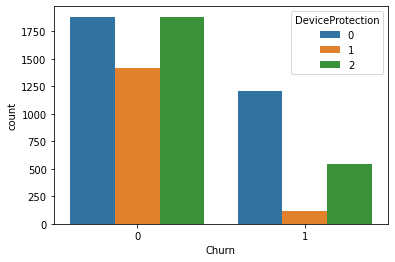

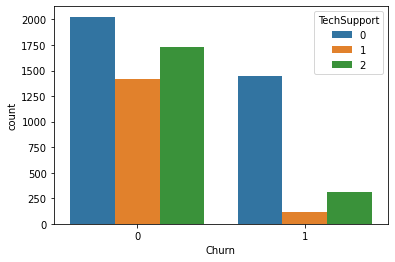

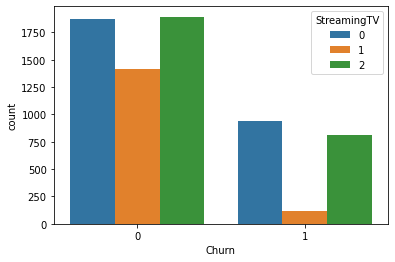

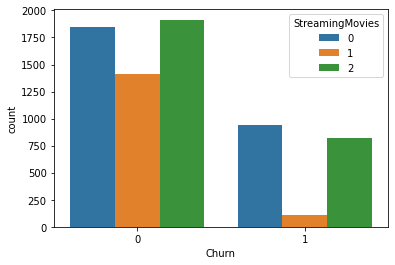

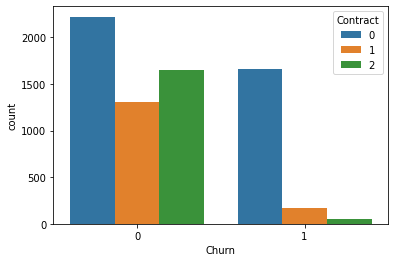

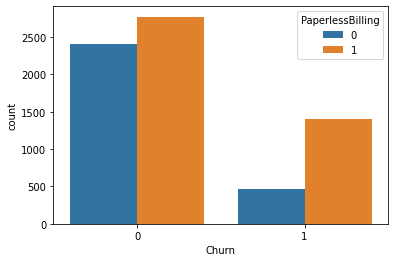

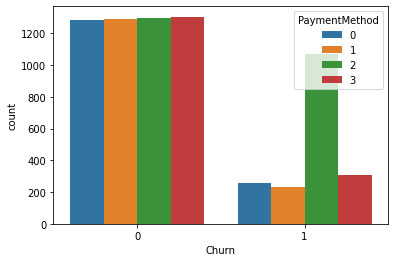

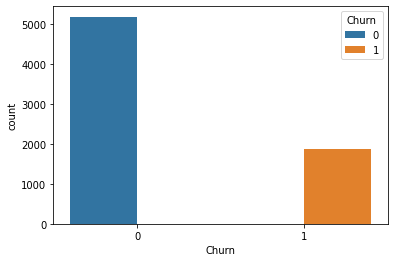

In [ ]:
#Check for all Categorical data
for col in df_cat:
    sns.countplot(data=df_new,x="Churn",hue=df_cat[col])
    plt.show()

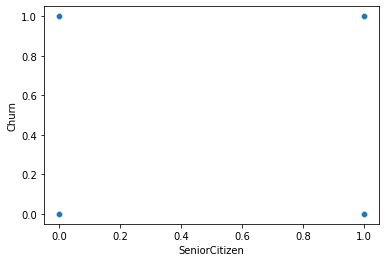

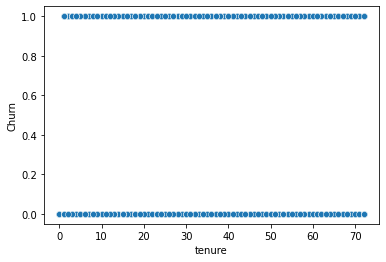

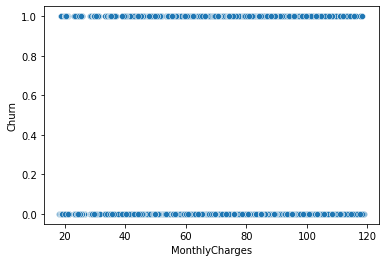

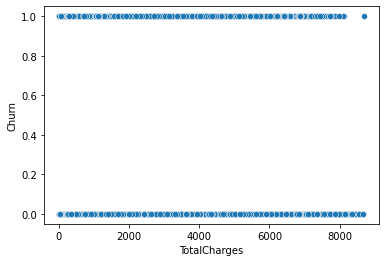

In [ ]:
#Check for all Numerical data
for col in df_num:
    sns.scatterplot(data=df_new,x=df_num[col],y="Churn")
    plt.show()

#2) Decision Tree Algorithms:
Data preparation: The decision Tree algorithms manages its own data preparation internally, so pretreatment to data is not required

In [ ]:
#import class
from sklearn.tree import DecisionTreeClassifier

2.1) Decision Tree with Gini Index

In [ ]:
#create the object of class DecisionTreeClassfier
dt=DecisionTreeClassifier()
#call function 
dt=create_model1(dt)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1585
           1       0.73      0.52      0.61      1585

    accuracy                           0.66      3170
   macro avg       0.68      0.66      0.66      3170
weighted avg       0.68      0.66      0.66      3170

Confusion Matrix
[[1278  307]
 [ 762  823]]


In [ ]:
#Check the important features taken by Decision Tree
d={'Features Imp':dt.feature_importances_,'Columns':X.columns}
#convert dictionary into DataFrae
data=pd.DataFrame(d)
#convert dictionary into DataFrae
data=pd.DataFrame(d)
data

,Features Imp,Columns
0,0.014591,SeniorCitizen
1,0.122001,tenure
2,0.198520,MonthlyCharges
3,0.178293,TotalCharges
4,0.020651,gender
5,0.015873,Partner
6,0.015325,Dependents
7,0.003231,PhoneService
8,0.015473,MultipleLines
9,0.011104,InternetService


In [ ]:
#But we got less score 0.73  its good but not excellent 
#reason behind less score , means overfit 
#model overfitting situation can be managed by pruning technique
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

2.1.1) max_depth

In [ ]:
#Create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=8) 
#Note:max_depth can not more than 8
#by default use method:gini index
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1585
           1       0.73      0.77      0.75      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

Confusion Matrix
[[1141  444]
 [ 369 1216]]


2.1.2) min_samples_leaf

In [ ]:
#Create object of DecisiontreeClassifier
dt2=DecisionTreeClassifier(min_samples_leaf=100) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50
#call function
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1585
           1       0.74      0.75      0.74      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

Confusion Matrix
[[1171  414]
 [ 401 1184]]


2.2) Decision Tree Entropy

In [ ]:
#use entropy method of decisiontree means -P(yes)*log2P(yes)-P(No)log2(P(no))
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)
dt3=create_model1(dt3)

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1585
           1       0.75      0.73      0.74      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

Confusion Matrix
[[1190  395]
 [ 427 1158]]


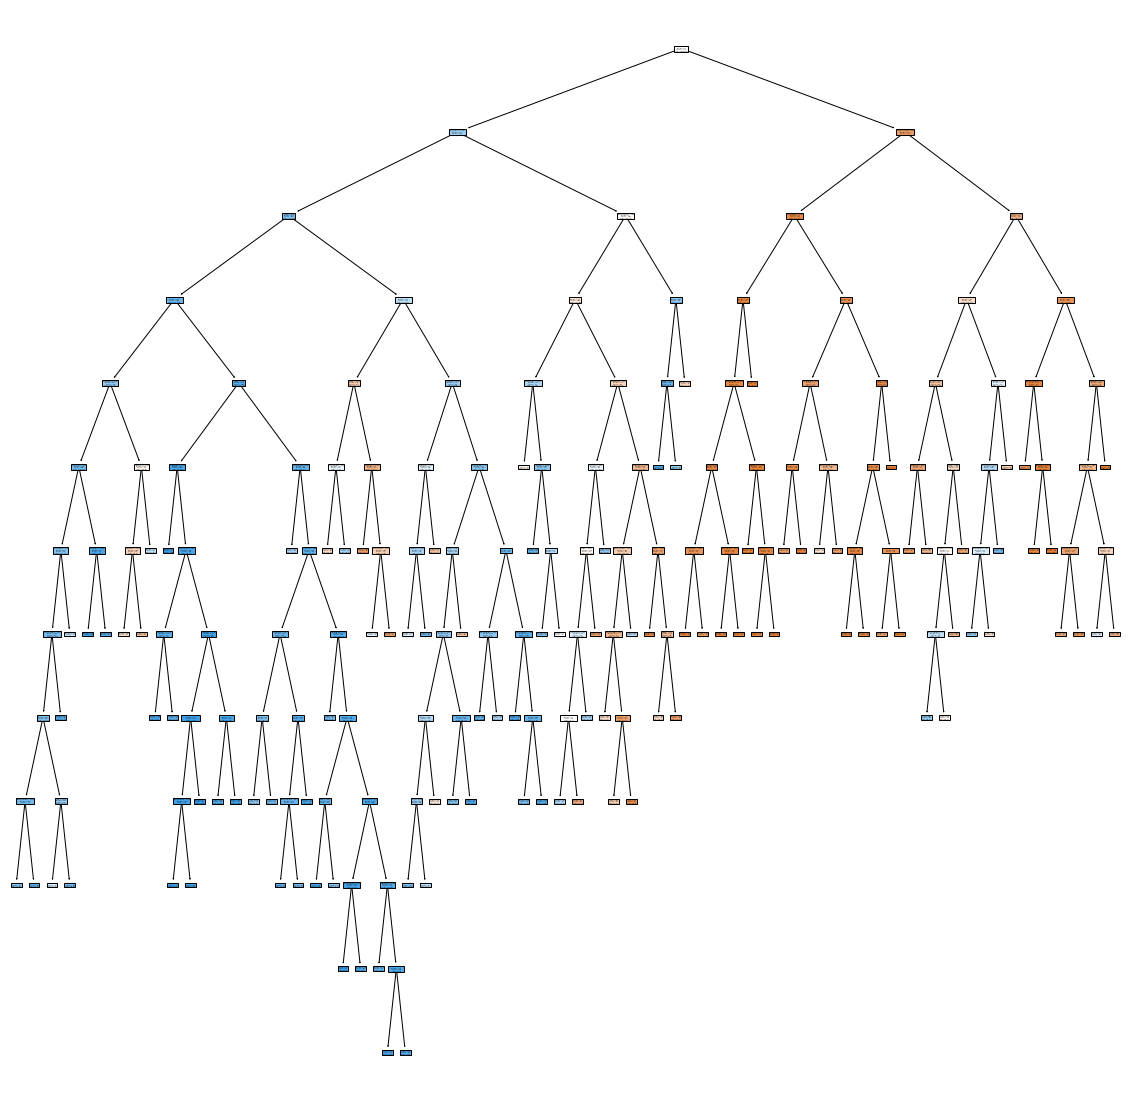

In [ ]:
#create the tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [ ]:
#Create object of DecisionTreeClassifier class
dt4=DecisionTreeClassifier(criterion='entropy',max_depth=8) 
#Note:max_depth can not more than 8
#by default use method:gini index
dt4=create_model1(dt4)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1585
           1       0.72      0.80      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.74      3170
weighted avg       0.75      0.75      0.74      3170

Confusion Matrix
[[1089  496]
 [ 310 1275]]


In [ ]:
#Create object of DecisionTreeClassifier class # Checking with Entropy
dt5=DecisionTreeClassifier(criterion='entropy') 
#call the function
dt5=create_model1(dt5)

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1585
           1       0.73      0.54      0.62      1585

    accuracy                           0.67      3170
   macro avg       0.68      0.67      0.67      3170
weighted avg       0.68      0.67      0.67      3170

Confusion Matrix
[[1272  313]
 [ 727  858]]


#**Ensembling Learning Techniques**

3) Naive Aggregation 

a. Hard Voting        b. Soft voting

4) Bootstrapping

a. Bagging 
b. pasting 
c.Random Forest Tree

5) Stacking Classifier

6) Boosting Technique

a. ADA Boost (Adaptor Boosting) 
b. Gradient Boosting 
c. Extreme Gradient Boosting(XG Boost)

3) Naive Aggregation

a. Hard Voting - Hard Voting: Voting is calculated on the predicted output class.

b. Soft voting - Voting is calculated on the predicted probability of the output class.

In [ ]:
#import class
from sklearn.ensemble import VotingClassifier

#Create a model list
model_list=[("logistic",lgr),("DecisionTree_Gini",dt),("DecisionTree_Entropy",dt5)]

#Create the object of Voting Classfier and passing the parameter model_list
vc=VotingClassifier(estimators=model_list)#Default is hard voting

#call function
vc=create_model1(vc)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1585
           1       0.76      0.63      0.69      1585

    accuracy                           0.72      3170
   macro avg       0.72      0.72      0.71      3170
weighted avg       0.72      0.72      0.71      3170

Confusion Matrix
[[1279  306]
 [ 593  992]]


In [ ]:
#For soft voting pass soft paramet
vc1=VotingClassifier(estimators=model_list,voting="soft")#Default is hard voting
#call function
vc1=create_model1(vc1)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1585
           1       0.76      0.63      0.69      1585

    accuracy                           0.72      3170
   macro avg       0.72      0.72      0.71      3170
weighted avg       0.72      0.72      0.71      3170

Confusion Matrix
[[1279  306]
 [ 592  993]]


4) Bootstrapping

a. Bagging - that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.

b. Pasting 


'''Difference between Bagging and pasting classifier : - 
In bagging classifier ,  the model is train with different samples with 
replacement .
while other hand  in pasting , the model is train with different samples 
without replacement'''

c.Random Forest Tree

In [ ]:
#import class
from sklearn.ensemble import BaggingClassifier
#a. Bagging Method with Logistic
#Create object of BaggingClassifier
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=704,random_state=1)
#By default Bootstrap is True means Bagging
#no. of records =10*704=7040 records
#call function
bc=create_model1(bc)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion Matrix
[[1157  428]
 [ 323 1262]]


In [ ]:
#b. Bagging with Decision Tree
bc1=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=704,random_state=1)#Bagging Decision tree
#call function
bc1=create_model1(bc1)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1585
           1       0.77      0.71      0.74      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

Confusion Matrix
[[1256  329]
 [ 461 1124]]


In [ ]:
#2. Pasting
#Create object of BaggingClassifier
bc2=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=704,random_state=1,bootstrap=False)
#Bootsrap is False means Pasting
#call function
bc2=create_model1(bc2)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion Matrix
[[1151  434]
 [ 317 1268]]


In [ ]:
#c. Random forest tree
#import class
from sklearn.ensemble import RandomForestClassifier
# create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=17,random_state=1)
#hit and trial method so we can adjust features nos manually
#call function
rfc=create_model1(rfc)

              precision    recall  f1-score   support

           0       0.69      0.86      0.76      1585
           1       0.81      0.61      0.70      1585

    accuracy                           0.74      3170
   macro avg       0.75      0.74      0.73      3170
weighted avg       0.75      0.74      0.73      3170

Confusion Matrix
[[1359  226]
 [ 612  973]]


In [ ]:
#Check the important features
d={'Features Imp':rfc.feature_importances_,'Columns':X.columns}
#convert dictionary into DataFrae
data=pd.DataFrame(d)
#convert dictionary into DataFrae
data=pd.DataFrame(d)
data

,Features Imp,Columns
0,0.014904,SeniorCitizen
1,0.115833,tenure
2,0.189515,MonthlyCharges
3,0.187613,TotalCharges
4,0.020920,gender
5,0.019502,Partner
6,0.017470,Dependents
7,0.002619,PhoneService
8,0.018659,MultipleLines
9,0.009807,InternetService


In [ ]:
rfc.feature_importances_

array([0.01490394, 0.11583325, 0.18951509, 0.18761307, 0.02091989,
       0.01950191, 0.01746968, 0.00261903, 0.01865925, 0.00980678,
       0.04789143, 0.01680307, 0.01423317, 0.02001757, 0.0115887 ,
       0.01640432, 0.21527334, 0.01856807, 0.04237844])

In [ ]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

6) Boosting Technique
a. ADA Boost (Adaptor Boosting) b. Gradient Boosting c. Extreme Gradient Boosting(XG Boost)

In [ ]:
#a.ADA Boost: Adaptor Boosting
from sklearn.ensemble import AdaBoostClassifier
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators=75) # n_estimators can be <=100
#AdaBoost create a decision stump means understood use model
#DecisionTreeClassifier
#call function
ada=create_model1(ada)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1585
           1       0.74      0.81      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

Confusion Matrix
[[1145  440]
 [ 309 1276]]


In [ ]:
#b. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100) #not <=100
#call function for classification report
gbc=create_model1(gbc)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1585
           1       0.74      0.79      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion Matrix
[[1158  427]
 [ 339 1246]]


In [ ]:
#c.Extreme Gradient Boosting
from xgboost import XGBClassifier
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=65,reg_alpha=1)#1 means true
#automatic overfitting: reg means regularisation and alpha or lambda or hyperparameter
#call function for classification report
xgc=create_model1(xgc)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion Matrix
[[1152  433]
 [ 307 1278]]


7) Support Vector Machines

#1. Linear SVC  : use for linear data

#2. polynomial kernal function : increase the low dimension to high dimension #Non-Linear data
#3. radial basis kernal function #Non-Linear data

In [ ]:
#Linear kernel Function means data is linearly separatable
#use inbuilt class LinearSVC which defined in SVM inbuilt package 
from sklearn.svm import LinearSVC
#SVC - Support Vector Classifier
#craete object
svc=LinearSVC(random_state=1)# by default hard margin no error added on training time
#call function
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1585
           1       0.74      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion Matrix
[[1143  442]
 [ 300 1285]]


In [ ]:
##score not bad but try its better 
#Apply soft margin means add externally error on training time
#create the object of inbuilt class LinearSVC  and passing parameter C
#for error
svc1=LinearSVC(random_state=1,C=0.5) #soft margin # C is parameter for adding error # C always capital
#Range of C : 0.01to0.9
#to reduce overfitting and remove outlier we apply soft margin
#call function
svc1=create_model1(svc1)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1585
           1       0.74      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion Matrix
[[1143  442]
 [ 300 1285]]


#Here if add external error on runtime but no changes in score means no 
#effect on score
#means we have data is non-linear data  , not linear dataset 
#So we will use polynomial kernel function means increase the dimension means
#to converts low dimension data into high dimension means if plot 1D then
#converting into 2D dimension and so on .

In [ ]:
#2. polynomial Kernel function of SVM, so use inbuilt class SVC
from sklearn.svm import SVC
#SVC inbuilt class for non linear data
#Craete the object of SVC class
poly_svc=SVC(random_state=1,kernel="poly")
#call function
poly_svc=create_model1(poly_svc)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1585
           1       0.75      0.76      0.75      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

Confusion Matrix
[[1176  409]
 [ 384 1201]]


In [ ]:
#Scores are changed in plynomial means data is non linear

In [ ]:
#try to check data is nonlinear or radial
#Craete the object of SVC class
r_svc=SVC(random_state=1,kernel="rbf")
#rbf means radial basis function
#call function
r_svc=create_model1(r_svc)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1585
           1       0.75      0.75      0.75      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

Confusion Matrix
[[1183  402]
 [ 389 1196]]


8) Gausssian - NaiveBays theorem

In [ ]:
from sklearn.naive_bayes import GaussianNB
#GaussianNB are applied on continuous numerical value of input column
#create the object of GaussianNB class
gnb=GaussianNB()
#train the model with 70% data
gnb.fit(X_train1,Y_train1)

GaussianNB()

In [ ]:
#test if the model with 30% data
Y_pred=gnb.predict(X_test1)

In [ ]:
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.75      1585
           1       0.74      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170



9) K Nearest Neighbour

In [ ]:
#Use K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
#create the object of KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) 
#p=2 means euclidean metric means sqrt(x2-x1)**2+(y2-y1)**2
#call function
knc=create_model1(knc)

              precision    recall  f1-score   support

           0       0.73      0.65      0.68      1585
           1       0.68      0.76      0.72      1585

    accuracy                           0.70      3170
   macro avg       0.70      0.70      0.70      3170
weighted avg       0.70      0.70      0.70      3170

Confusion Matrix
[[1023  562]
 [ 384 1201]]


5) Stacking Classifier - Ensemble learning # giving error -it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

#call StackingClassifier
from mlxtend.classifier import StackingClassifier

In [ ]:
#Create object of logistic Regression, Decision Tree Entropy and Decision Tree Gini
lgr=LogisticRegression()
dt1=DecisionTreeClassifier(criterion="entropy")
dt2=DecisionTreeClassifier()#by default Gini index

In [ ]:
#Take LogisticRegression algorithm for metaclssifier
#also create a object of LogisticRegression
meta=LogisticRegression()

In [ ]:
#Create the object of StackingClassifier Class
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [ ]:
#sc=create_model(sc) #giving clone object error

In [ ]:
#Check the % of fraud count
df["Churn"].value_counts()/df.shape[0]*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64